<a href="https://colab.research.google.com/github/sirilalithaadapa/COVID19-prediction/blob/main/COVID19_prediction_Sirilalithaadapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Initial Hypothesis***

1. **Prediction Hypothesis**: We hypothesize that COVID-19 can be predicted by analyzing symptoms and certain personal information.

2. **Benefits of Accurate Prediction**: Accurate prediction can expedite treatment, optimize resource utilization, and improve disease management, thereby reducing the strain on healthcare systems.

3. **Common Symptoms Hypothesis**: COVID-19 frequently manifests with symptoms such as coughing, fever, and respiratory difficulties.

4. **Uncommon Symptoms Hypothesis**: Individuals without COVID-19 are less likely to experience symptoms like sore throat or headache.

5. **Symptoms in Specific Groups**: Men with COVID-19 who have had contact with individuals from other countries might exhibit higher incidences of coughing and fever.

6. **Age and Severity Hypothesis**: Individuals aged 60 and older may experience more severe symptoms, particularly respiratory distress.


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
# Libraries used for Encoding
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn.metrics import classification_report,confusion_matrix,r2_score, accuracy_score,precision_score,recall_score,f1_score,log_loss

#Hyperparametric Tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings("ignore") # to ignoring wranings

In [ ]:
# To load the data (.csv file)
covid_raw = pd.read_csv('corona_tested_006.csv')

In [ ]:
# creating a copy of read file
covid = covid_raw.copy()

**Exploratory Data Analysis- EDA**

In [ ]:
covid_raw.shape

(278848, 11)

In [ ]:
covid_raw.head().T

,0,1,2,3,4
Ind_ID,1,2,3,4,5
Test_date,11-03-2020,11-03-2020,11-03-2020,11-03-2020,11-03-2020
Cough_symptoms,True,False,False,True,True
Fever,False,True,True,False,False
Sore_throat,True,False,False,False,False
Shortness_of_breath,False,False,False,False,False
Headache,False,False,False,False,False
Corona,negative,positive,positive,negative,negative
Age_60_above,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN


In [ ]:
covid_raw.tail().T

,278843,278844,278845,278846,278847
Ind_ID,278844,278845,278846,278847,278848
Test_date,30-04-2020,30-04-2020,30-04-2020,30-04-2020,30-04-2020
Cough_symptoms,False,False,False,False,False
Fever,False,False,False,False,False
Sore_throat,False,False,False,False,False
Shortness_of_breath,False,False,False,False,False
Headache,False,False,False,False,False
Corona,positive,negative,negative,negative,negative
Age_60_above,NaN,NaN,NaN,NaN,NaN
Sex,male,female,male,male,female


In [ ]:
covid_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [ ]:
covid.describe(include = 'all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278596,278596,278847,278847,278847,278848,151528,259285,278848
unique,NaN,51,2,2,2,2,2,3,2,2,3
top,NaN,20-04-2020,False,False,False,False,False,negative,No,female,Other
freq,NaN,10921,236368,256844,276921,277270,276433,260227,125703,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking unique values


In [ ]:
covid.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

In [ ]:
for column in covid:
    unique_value=covid[column].unique()
    print(f'unique Value in {column}:',unique_value)

unique Value in Ind_ID: [     1      2      3 ... 278846 278847 278848]
unique Value in Test_date: ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
unique Value in Cough_symptoms: [True False nan]
unique Value in Fever: [False True nan]
unique Value in Sore_throat: [True False nan]
unique Value in Shortness_of_breath: [False True nan]
unique Value in Headache: [False True

# Analyzing amount of missing values

In [ ]:
# create a table now
missing_values=covid.isnull().sum() # missing values

percent_missing = covid.isnull().sum()/covid.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Ind_ID,0,0.000000
Test_date,0,0.000000
Cough_symptoms,252,0.090372
Fever,252,0.090372
Sore_throat,1,0.000359
Shortness_of_breath,1,0.000359
Headache,1,0.000359
Corona,0,0.000000
Age_60_above,127320,45.659284
Sex,19563,7.015650


# null values.

In [ ]:
covid.isnull()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,False,False,False,True,False,False
278844,False,False,False,False,False,False,False,False,True,False,False
278845,False,False,False,False,False,False,False,False,True,False,False
278846,False,False,False,False,False,False,False,False,True,False,False


# Correlation between features and target variable

<Axes: >

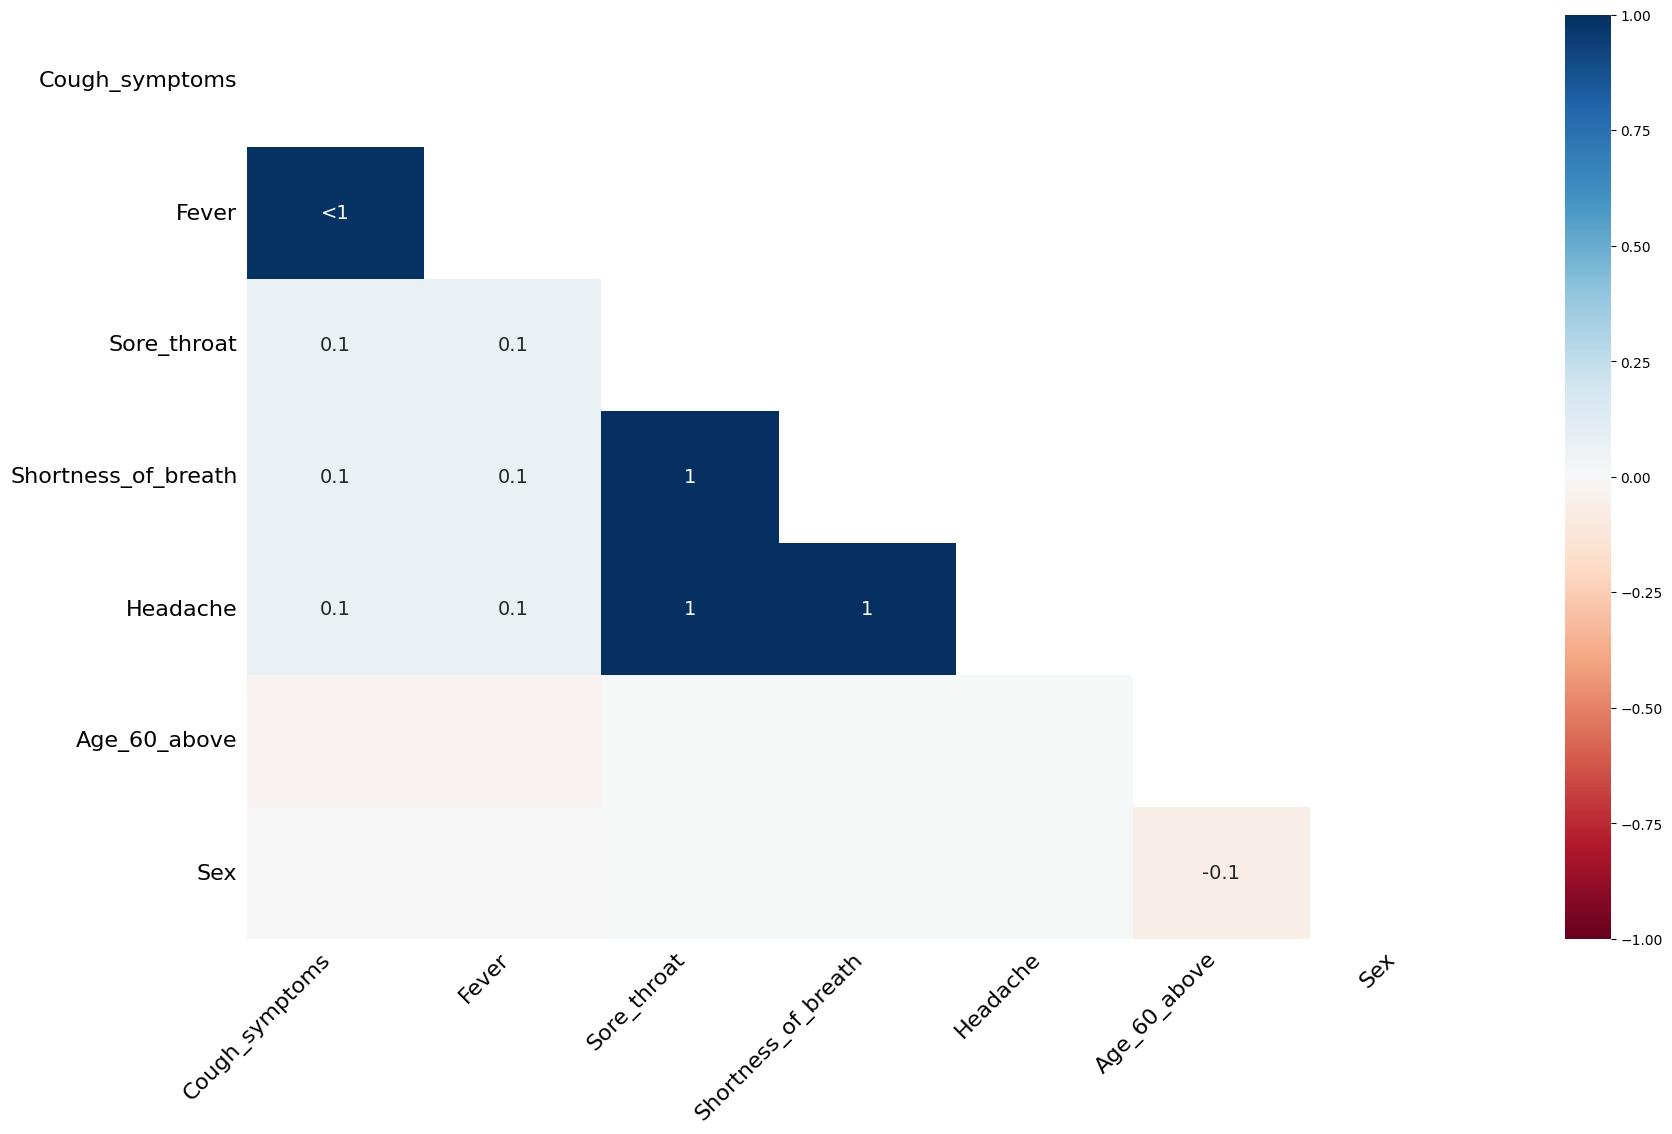

In [ ]:
msno.heatmap(covid)

In [ ]:
covid.drop_duplicates()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [ ]:
covid[covid.duplicated()]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


# Imputation Values

In [ ]:
# Converting null values of Sex column to others
value = 'other'
covid['Sex'].fillna(value,inplace=True)
covid

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,other,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,other,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,other,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,other,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,other,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [ ]:
gender=covid['Sex'].unique()
gender

array(['other', 'male', 'female'], dtype=object)

In [ ]:
# Date&Time Formatting
covid['Test_date']=pd.to_datetime(covid['Test_date'], format='%d-%m-%Y')

In [ ]:
#percentage of missing values
covid.isnull().sum()/len(covid)

Ind_ID                 0.000000
Test_date              0.000000
Cough_symptoms         0.000904
Fever                  0.000904
Sore_throat            0.000004
Shortness_of_breath    0.000004
Headache               0.000004
Corona                 0.000000
Age_60_above           0.456593
Sex                    0.000000
Known_contact          0.000000
dtype: float64

In [ ]:
columns_to_replace = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']

covid[columns_to_replace]=covid[columns_to_replace].replace({True: 'TRUE',False: 'FALSE', 'nan': np.nan})

In [ ]:
for column in covid:
    unique_value=covid[column].unique()
    print(f'unique Value in {column}:',unique_value)

unique Value in Ind_ID: [     1      2      3 ... 278846 278847 278848]
unique Value in Test_date: <DatetimeArray>
['2020-03-11 00:00:00', '2020-03-12 00:00:00', '2020-03-13 00:00:00',
 '2020-03-14 00:00:00', '2020-03-15 00:00:00', '2020-03-16 00:00:00',
 '2020-03-17 00:00:00', '2020-03-18 00:00:00', '2020-03-19 00:00:00',
 '2020-03-20 00:00:00', '2020-03-21 00:00:00', '2020-03-22 00:00:00',
 '2020-03-23 00:00:00', '2020-03-24 00:00:00', '2020-03-25 00:00:00',
 '2020-03-26 00:00:00', '2020-03-27 00:00:00', '2020-03-28 00:00:00',
 '2020-03-29 00:00:00', '2020-03-30 00:00:00', '2020-03-31 00:00:00',
 '2020-04-01 00:00:00', '2020-04-02 00:00:00', '2020-04-03 00:00:00',
 '2020-04-04 00:00:00', '2020-04-05 00:00:00', '2020-04-06 00:00:00',
 '2020-04-07 00:00:00', '2020-04-08 00:00:00', '2020-04-09 00:00:00',
 '2020-04-10 00:00:00', '2020-04-11 00:00:00', '2020-04-12 00:00:00',
 '2020-04-13 00:00:00', '2020-04-14 00:00:00', '2020-04-15 00:00:00',
 '2020-04-16 00:00:00', '2020-04-17 00:00:00'

In [ ]:
gender=covid['Sex'].unique()
gender

array(['other', 'male', 'female'], dtype=object)

In [ ]:
#percent of missing values
covid.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                         0
Known_contact               0
dtype: int64

In [ ]:
#now drop the null values
covid = covid.dropna(subset=['Age_60_above','Cough_symptoms','Fever'])

In [ ]:
# after dropping check it
covid.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
covid

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
4512,4513,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,No,other,Other
4513,4514,2020-03-17,FALSE,FALSE,FALSE,TRUE,FALSE,negative,No,other,Abroad
4514,4515,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,Yes,other,Other
4515,4516,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,positive,No,other,Other
4516,4517,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,other,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,2020-04-14,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Yes,male,Abroad
156036,156037,2020-04-14,TRUE,FALSE,TRUE,TRUE,FALSE,negative,No,male,Abroad
156037,156038,2020-04-14,TRUE,TRUE,FALSE,FALSE,FALSE,negative,No,female,Abroad
156038,156039,2020-04-14,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other


In [ ]:
covid.nunique()

Ind_ID                 151279
Test_date                  29
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         3
Known_contact               3
dtype: int64

# After Cleaning

In [ ]:
covid['Corona'].value_counts()

Corona
negative    137606
positive     11437
other         2236
Name: count, dtype: int64

In [ ]:
covid['Sex'].value_counts()
#to find count of total males and females

Sex
male      70101
female    68071
other     13107
Name: count, dtype: int64

In [ ]:
covid['Fever'].value_counts()

Fever
FALSE    137538
TRUE      13741
Name: count, dtype: int64

In [ ]:
covid['Cough_symptoms'].value_counts()

Cough_symptoms
FALSE    124706
TRUE      26573
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

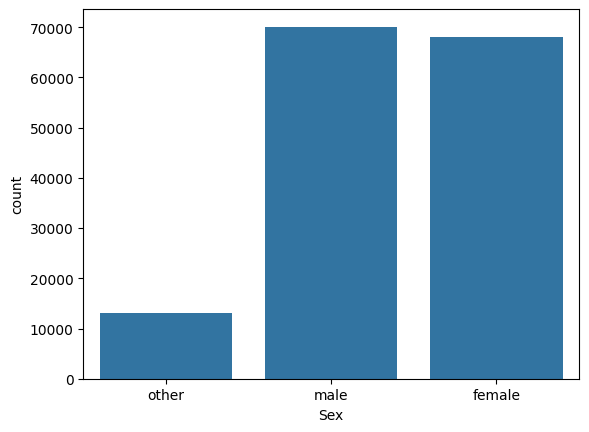

In [ ]:
sns.countplot(x='Sex', data=covid)
plt.show()

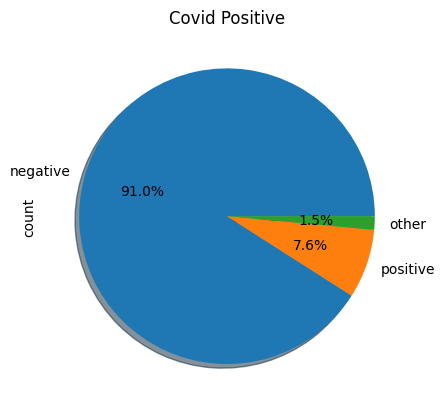

In [ ]:
covid["Corona"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

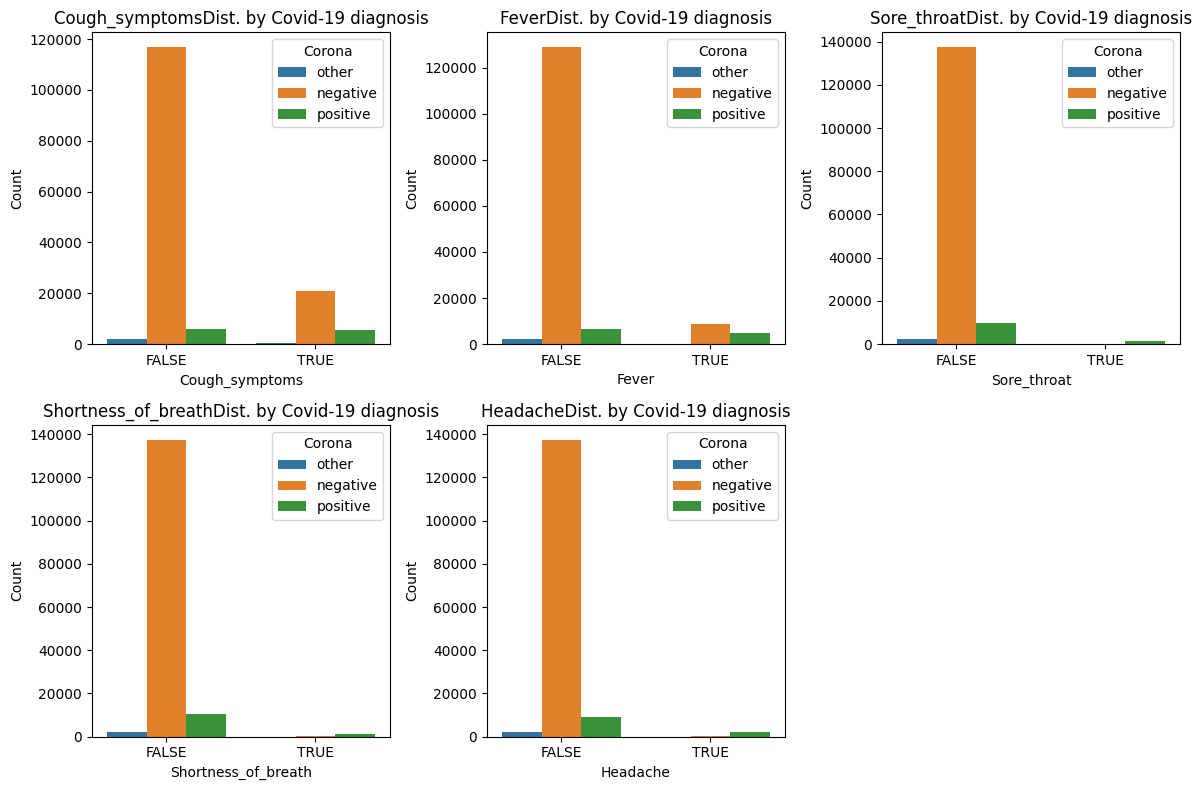

In [ ]:
#Symptoms Distribution Visualisation
symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath', 'Headache']
plt.figure(figsize=(12,8))
for i, symptom in enumerate(symptoms):
    plt.subplot(2,3,i+1)
    sns.countplot(x=symptom,data = covid, hue='Corona')
    plt.title(f'{symptom}Dist. by Covid-19 diagnosis')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


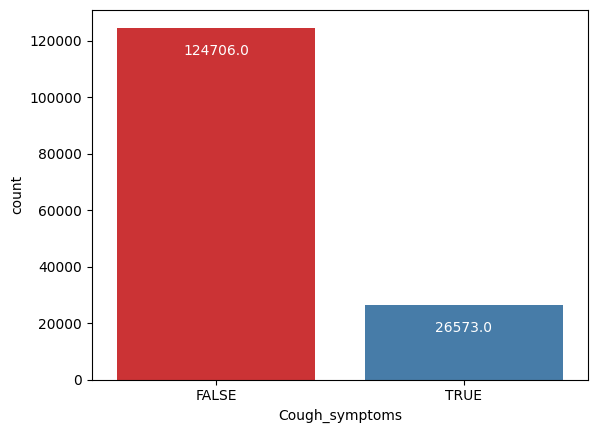

In [ ]:
ax = sns.countplot(x='Cough_symptoms',data=covid, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

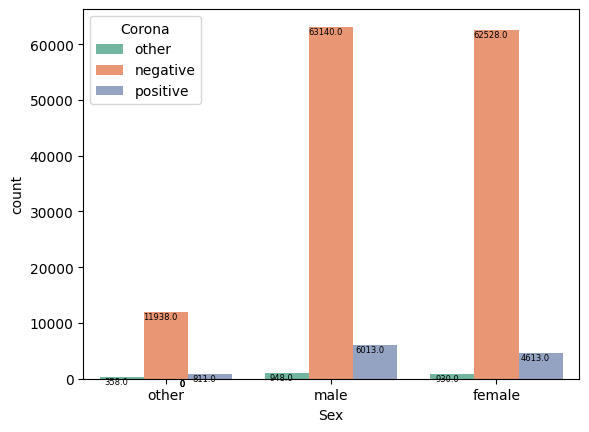

In [ ]:
ax = sns.countplot(x='Sex',hue='Corona',data=covid, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+100), ha='center', va='center', color='black', size=6)
plt.show()

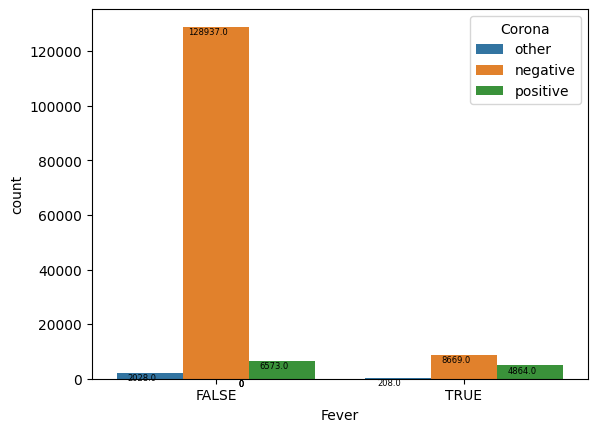

In [ ]:
ax = sns.countplot(x='Fever',hue='Corona',data=covid)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+100), ha='center', va='center', color='Black', size=6)
plt.show()

# Feature Engineering
## Data Splitting

In [ ]:
df_train_val= covid.query("Test_date <= '2020-04-15' and Test_date >= '2020-03-11'")
df_test = covid.query("Test_date <= '2020-04-30' and Test_date >= '2020-03-16'")
df_train_val

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
4512,4513,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,No,other,Other
4513,4514,2020-03-17,FALSE,FALSE,FALSE,TRUE,FALSE,negative,No,other,Abroad
4514,4515,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,Yes,other,Other
4515,4516,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,positive,No,other,Other
4516,4517,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,other,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,2020-04-14,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Yes,male,Abroad
156036,156037,2020-04-14,TRUE,FALSE,TRUE,TRUE,FALSE,negative,No,male,Abroad
156037,156038,2020-04-14,TRUE,TRUE,FALSE,FALSE,FALSE,negative,No,female,Abroad
156038,156039,2020-04-14,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other


In [ ]:
#Dropping few unnecessary columns:

df_train_val= df_train_val.drop(columns=['Test_date','Ind_ID','Age_60_above','Sex'])
df_test= df_test.drop(columns=['Test_date','Ind_ID','Age_60_above','Sex'])

In [ ]:
df_train_val.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
4512,FALSE,FALSE,FALSE,FALSE,FALSE,other,Other
4513,FALSE,FALSE,FALSE,TRUE,FALSE,negative,Abroad
4514,FALSE,FALSE,FALSE,FALSE,FALSE,other,Other
4515,FALSE,FALSE,FALSE,FALSE,FALSE,positive,Other
4516,FALSE,FALSE,FALSE,FALSE,FALSE,negative,Other


In [ ]:
df_test.tail()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
156035,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Abroad
156036,TRUE,FALSE,TRUE,TRUE,FALSE,negative,Abroad
156037,TRUE,TRUE,FALSE,FALSE,FALSE,negative,Abroad
156038,FALSE,FALSE,FALSE,FALSE,FALSE,negative,Other
156039,FALSE,FALSE,FALSE,FALSE,FALSE,negative,Other


# Label Encoding

## Now let's encode the training data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Le=LabelEncoder()

In [ ]:
df_train_val['Cough_symptoms']=Le.fit_transform(df_train_val['Cough_symptoms'])
df_train_val['Fever']=Le.fit_transform(df_train_val['Fever'])
df_train_val['Sore_throat']=Le.fit_transform(df_train_val['Sore_throat'])
df_train_val['Shortness_of_breath']=Le.fit_transform(df_train_val['Shortness_of_breath'])
df_train_val['Corona']=Le.fit_transform(df_train_val['Corona'])
df_train_val['Headache']=Le.fit_transform(df_train_val['Headache'])
df_train_val['Known_contact']=Le.fit_transform(df_train_val['Known_contact'])

In [ ]:
df_train_val.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
4512,0,0,0,0,0,1,2
4513,0,0,0,1,0,0,0
4514,0,0,0,0,0,1,2
4515,0,0,0,0,0,2,2
4516,0,0,0,0,0,0,2


# Encoding the test data now

In [ ]:
df_test['Cough_symptoms']=Le.fit_transform(df_test['Cough_symptoms'])
df_test['Fever']=Le.fit_transform(df_test['Fever'])
df_test['Sore_throat']=Le.fit_transform(df_test['Sore_throat'])
df_test['Shortness_of_breath']=Le.fit_transform(df_test['Shortness_of_breath'])
df_test['Corona']=Le.fit_transform(df_test['Corona'])
df_test['Headache']=Le.fit_transform(df_test['Headache'])
df_test['Known_contact']=Le.fit_transform(df_test['Known_contact'])

In [ ]:
df_test.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
4512,0,0,0,0,0,1,2
4513,0,0,0,1,0,0,0
4514,0,0,0,0,0,1,2
4515,0,0,0,0,0,2,2
4516,0,0,0,0,0,0,2


Scaling


In [ ]:
# import module
from sklearn.preprocessing import StandardScaler

# compute required values
scaler = StandardScaler()
model = scaler.fit(df_train_val)
scaled_data = model.transform(df_train_val)

# print scaled data
print(scaled_data)

[[-0.4616115  -0.31608058 -0.10497865 ... -0.12425143  1.54969546
   0.41169677]
 [-0.4616115  -0.31608058 -0.10497865 ... -0.12425143 -0.30841849
  -2.75138479]
 [-0.4616115  -0.31608058 -0.10497865 ... -0.12425143  1.54969546
   0.41169677]
 ...
 [ 2.16632385  3.16375018 -0.10497865 ... -0.12425143 -0.30841849
  -2.75138479]
 [-0.4616115  -0.31608058 -0.10497865 ... -0.12425143 -0.30841849
   0.41169677]
 [-0.4616115  -0.31608058 -0.10497865 ... -0.12425143 -0.30841849
   0.41169677]]


In [ ]:
covid

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
4512,4513,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,No,other,Other
4513,4514,2020-03-17,FALSE,FALSE,FALSE,TRUE,FALSE,negative,No,other,Abroad
4514,4515,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,Yes,other,Other
4515,4516,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,positive,No,other,Other
4516,4517,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,other,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,2020-04-14,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Yes,male,Abroad
156036,156037,2020-04-14,TRUE,FALSE,TRUE,TRUE,FALSE,negative,No,male,Abroad
156037,156038,2020-04-14,TRUE,TRUE,FALSE,FALSE,FALSE,negative,No,female,Abroad
156038,156039,2020-04-14,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other


Feature Selection - Using Chi-Square Test


In [ ]:
#Libraries for chi test
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [ ]:
X=df_train_val.drop(['Corona'],axis=1)
y = df_train_val['Corona']
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X,y)
p_values = selector.pvalues_
p_values_df = pd.DataFrame({'Feature': X.columns, 'P_values':p_values})
print(p_values_df)

               Feature  P_values
0       Cough_symptoms       0.0
1                Fever       0.0
2          Sore_throat       0.0
3  Shortness_of_breath       0.0
4             Headache       0.0
5        Known_contact       0.0


<Axes: >

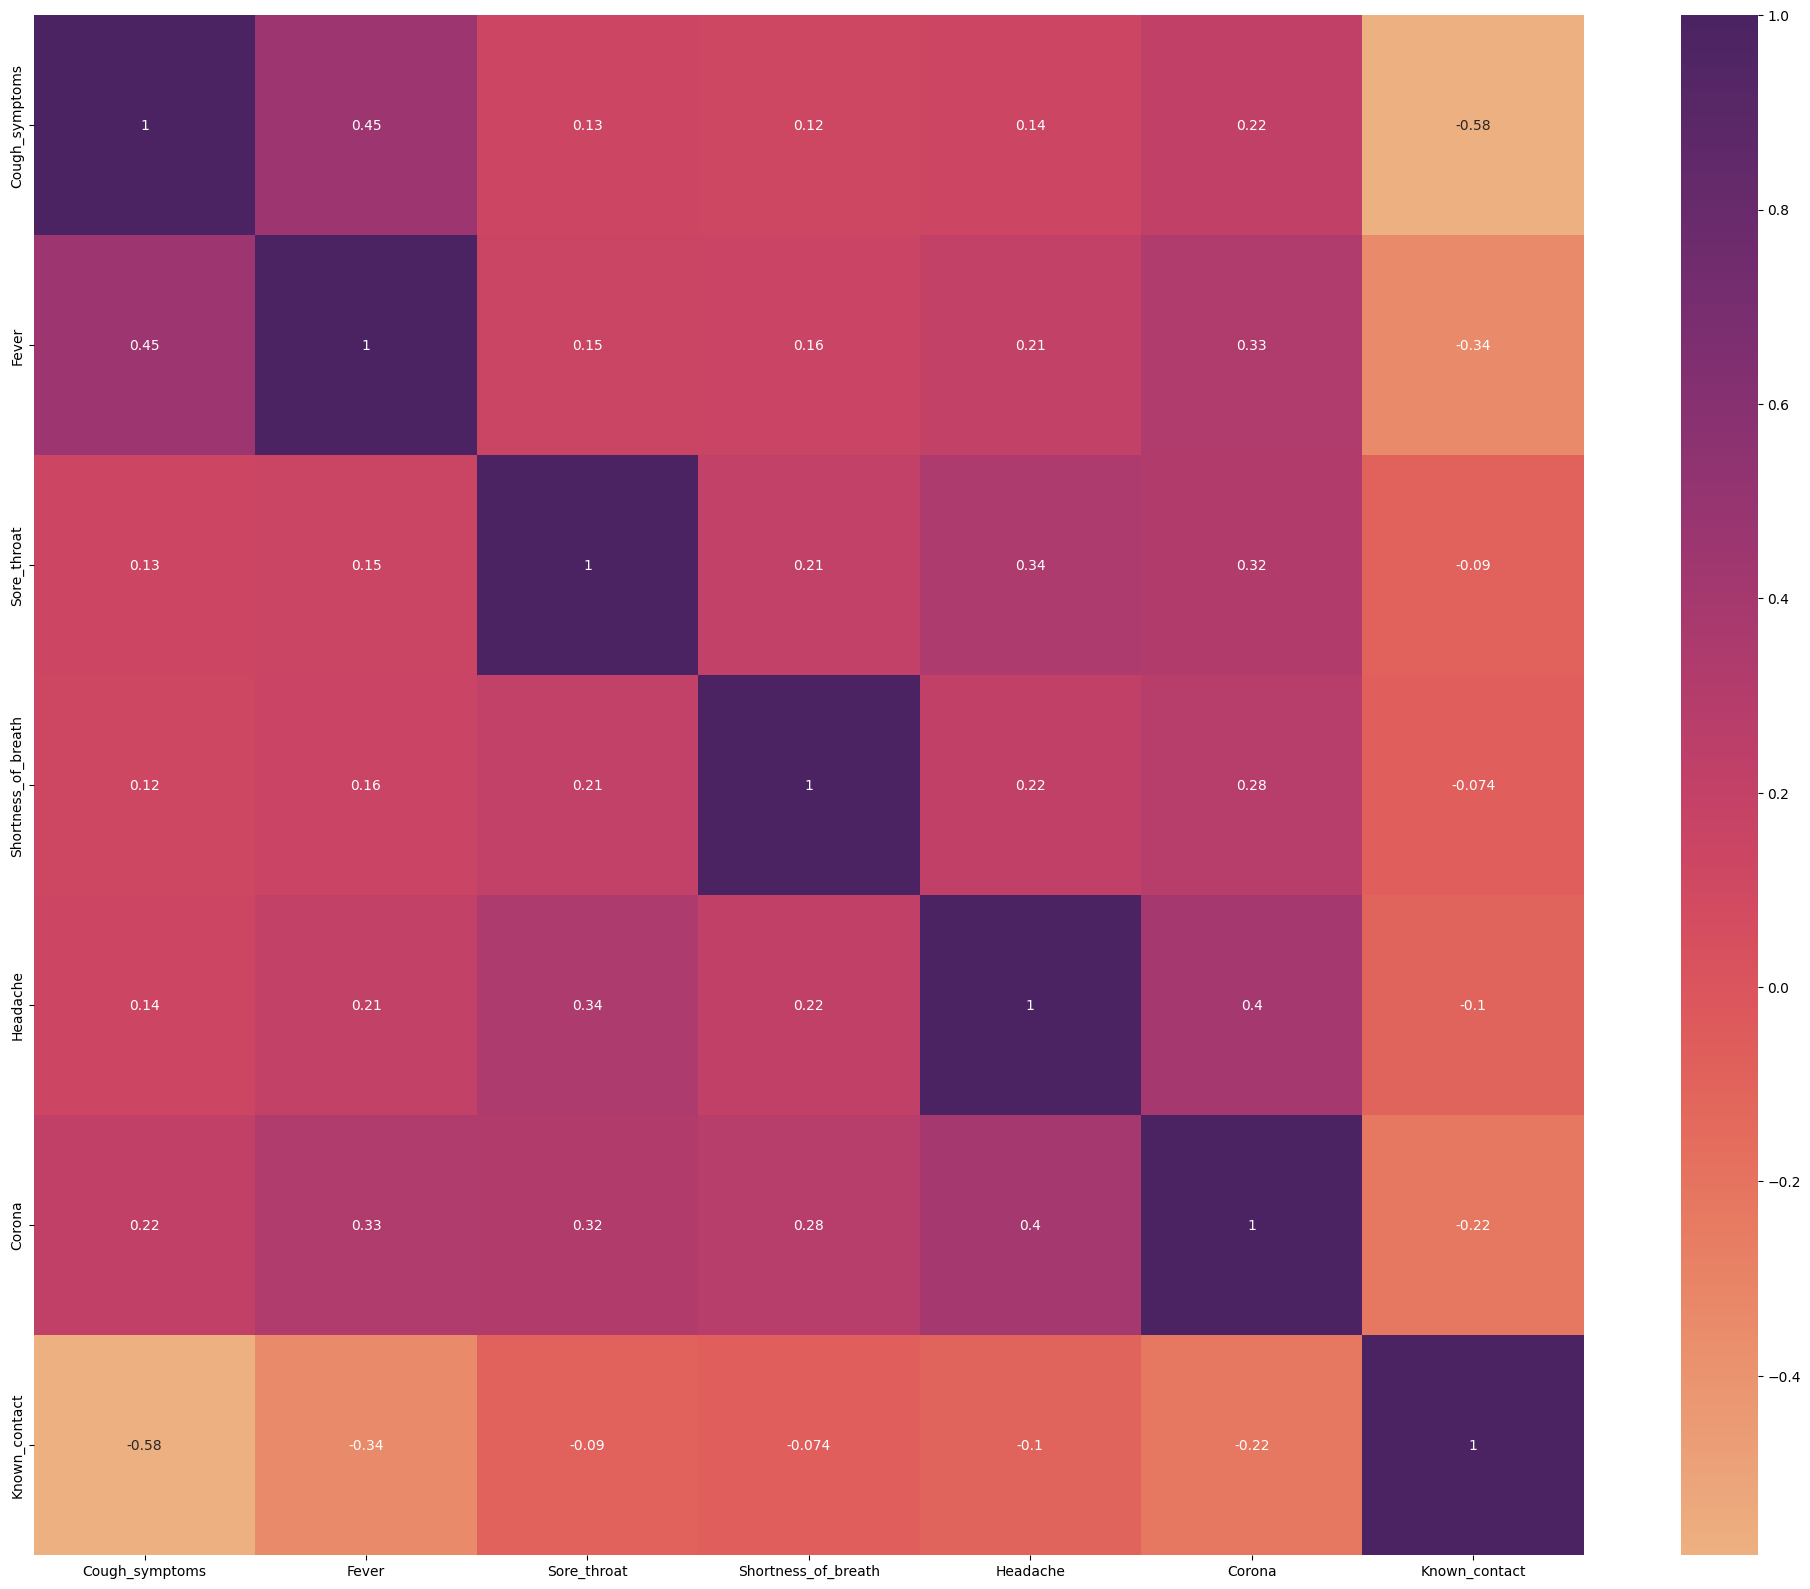

In [ ]:
plt.figure(figsize=(25,20))  # Heat map to find correlation between features
sns.heatmap(df_train_val.corr(), annot=True, cmap="flare")

## Machine Learning Approach (Model Training)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split the data into features(x) and target variable(y)
X = df_train_val.drop('Corona',axis=1)
y= df_train_val['Corona']

In [ ]:
# split the date into training and validation sets:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
#Print the shapes of the split sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (121023, 6)
X_test shape: (30256, 6)
y_train shape: (121023,)
y_test shape: (30256,)


# Model1- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#create a Logistic Regression model
model1 = LogisticRegression(random_state = 0)
#Train the model on the training data
model1.fit(X_train,y_train)
#Make predictions on the validation data
y_pred1 = model1.predict(X_test)
# Calculate the accuracy of the model
accuracy= round(accuracy_score(y_test,y_pred1)*100,2)

print(f"Logistic regression Accuracy Score for the validating  Date: {accuracy}")

Logistic regression Accuracy Score for the validating  Date: 93.14


In [ ]:
#split the data into features(x) and target variable(y)
X = df_test.drop('Corona',axis=1)
y= df_test['Corona']
#Make predictions on the test data
y_pred2= model1.predict(X)
#Calculate the accuracy of the model
accuracy = round(accuracy_score(y,y_pred2)*100,2)
print(f"Logistic regression Accuracy Score for the Test Date: {accuracy}")

Logistic regression Accuracy Score for the Test Date: 93.19


**The accuracy we got using Logistic Regression on test data is 93.19%**


In [ ]:
#accuracy score
print(accuracy_score(y_test,y_pred1))

#r2 score
print(r2_score(y_test,y_pred1))

#Log_loss
logloss = log_loss(y_test, model1.predict_proba(X_test))
print(round(logloss,2))

0.9313524590163934
0.20295270448428304
0.26


Hyper parameter Tuning


In [ ]:
confusion_mat=confusion_matrix(y_test, y_pred1)
confusion_mat

array([[27467,     0,    53],
       [  408,     0,    14],
       [ 1602,     0,   712]])

In [ ]:
# Define the hyperparameter grid to search for logistic regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_
print(best_params_lr)
print(best_model_lr)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


In [ ]:
lr_mod_best = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
lr_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_lr = lr_mod_best.predict(X)
class_report_lr_best = classification_report(y, y_pred_best_lr)
print(f"Classification Report :\n {class_report_lr_best}")

Classification Report :
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    137606
           1       0.00      0.00      0.00      2236
           2       0.91      0.32      0.47     11437

    accuracy                           0.93    151279
   macro avg       0.62      0.44      0.48    151279
weighted avg       0.92      0.93      0.91    151279



In [ ]:
lrmodel_accuracy = round(accuracy_score(y, y_pred_best_lr)*100, 2)
print(f"Accuracy score after tuning : {lrmodel_accuracy}")

Accuracy score after tuning : 93.19


**Model2-Decision Tree**

In [ ]:
print(X_train.shape)
print(X_test.shape)

(121023, 6)
(30256, 6)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree model
model2 = DecisionTreeClassifier()
# Train the model on the training data
model2.fit(X_train, y_train)
# Make predictions on the validation data
y_pred = model2.predict(X_test)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f"Decision Tree Accuracy Score for validation Data : {accuracy}")

Decision Tree Accuracy Score for validation Data : 94.46


In [ ]:
X = df_test.drop('Corona', axis=1)
y = df_test['Corona']

# Make predictions on the test data
y_pred = model2.predict(X)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,2)
print(f"Decision Tree Accuracy Score for Test Data : {accuracy}")

Decision Tree Accuracy Score for Test Data : 94.4


**Hyper parameter Tuning**

In [ ]:
# Define the hyperparameter grid to search for DST
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(model2, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
print(best_params_dt)
print(best_model_dt)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier()


In [ ]:
dt_mod_best = DecisionTreeClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split = 2)
dt_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_dt = dt_mod_best.predict(X)
class_report_dt_best = classification_report(y, y_pred_best_dt)
print(f"Classification Report :\n {class_report_dt_best}")

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    137606
           1       0.00      0.00      0.00      2236
           2       0.81      0.58      0.68     11437

    accuracy                           0.94    151279
   macro avg       0.59      0.52      0.55    151279
weighted avg       0.93      0.94      0.93    151279



In [ ]:
dtmodel_accuracy = round(accuracy_score(y, y_pred_best_dt)*100, 4)
print(f"Accuracy score after tuning : {dtmodel_accuracy}")

Accuracy score after tuning : 94.4017


# **Model3- Xgboost**


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier, plot_tree
import xgboost as xgb
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

In [ ]:
# Make predictions and find accuracy on the validation data
from xgboost import XGBClassifier
from sklearn import metrics
xgb2=XGBClassifier()
xgb2.fit(X_train,y_train)
y_pred1=xgb2.predict(X_test)
accuracyxg =metrics.accuracy_score(y_pred1,y_test)
print(accuracyxg)

0.9446390798519302


In [ ]:
# Make predictions and find accuracy on the test data
X = df_test.drop('Corona', axis=1)
y = df_test['Corona']
xgb2=XGBClassifier()
xgb2.fit(X_train,y_train)
y_pred=xgb2.predict(X)
accuracyxg =metrics.accuracy_score(y_pred,y)
print(accuracyxg)

0.9440173454345944


In [ ]:
#Compute the rmse by invoking the mean_sqaured_error function from sklearn's
#metrics module.
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print("RMSE: %f" % (rmse))

RMSE: 0.423793


In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
#Invoking XGBoost's cv() method and store the results in a cv_results DataFrame
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
# We have to Extract and print the final boosting round metric.
print((cv_results["test-rmse-mean"]).tail(1))

49    0.431689
Name: test-rmse-mean, dtype: float64


In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics
xgb1=XGBClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split= 2, n_estimators= 50, random_state= 42)
xgb1.fit(X_train,y_train)
ypred=xgb1.predict(X)
accuracyxg =metrics.accuracy_score(ypred,y)
print(accuracyxg)

0.9440173454345944


**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb

# Corrected hyperparameter grid for XGBoost
param_grid_xg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
}

# Using RandomizedSearchCV for a faster search
random_search_xg = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(),
    param_distributions=param_grid_xg,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_xg.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_xg = random_search_xg.best_params_
best_model_xg = random_search_xg.best_estimator_
print(best_params_xg)
print(best_model_xg)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Use the best hyperparameters from RandomizedSearchCV
xg_mod_best = XGBClassifier(
    max_depth=best_params_xg['max_depth'],
    n_estimators=best_params_xg['n_estimators'],
    learning_rate=best_params_xg['learning_rate'],
    subsample=best_params_xg['subsample'],
    colsample_bytree=best_params_xg['colsample_bytree'],
    gamma=best_params_xg['gamma'],
    reg_alpha=best_params_xg['reg_alpha'],
    reg_lambda=best_params_xg['reg_lambda'],
    random_state=42
)

# Fit the model on the training data
xg_mod_best.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_best_xg = xg_mod_best.predict(X_test)

# Generate the classification report
class_report_xg_best = classification_report(y_test, y_pred_best_xg)
print(f"Classification Report:\n{class_report_xg_best}")


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27520
           1       0.00      0.00      0.00       422
           2       0.81      0.58      0.68      2314

    accuracy                           0.94     30256
   macro avg       0.59      0.52      0.55     30256
weighted avg       0.93      0.94      0.93     30256



In [ ]:
from sklearn.metrics import accuracy_score

# Use the best hyperparameters from RandomizedSearchCV
xg_mod_best = XGBClassifier(
    max_depth=best_params_xg['max_depth'],
    n_estimators=best_params_xg['n_estimators'],
    learning_rate=best_params_xg['learning_rate'],
    subsample=best_params_xg['subsample'],
    colsample_bytree=best_params_xg['colsample_bytree'],
    gamma=best_params_xg['gamma'],
    reg_alpha=best_params_xg['reg_alpha'],
    reg_lambda=best_params_xg['reg_lambda'],
    random_state=42
)

# Fit the model on the training data
xg_mod_best.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_best_xg = xg_mod_best.predict(X_test)

# Generate the classification report
class_report_xg_best = classification_report(y_test, y_pred_best_xg)
print(f"Classification Report:\n{class_report_xg_best}")

# Calculate the accuracy score
xgmodel_accuracy = round(accuracy_score(y_test, y_pred_best_xg) * 100, 4)
print(f"Accuracy score after tuning: {xgmodel_accuracy}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27520
           1       0.00      0.00      0.00       422
           2       0.81      0.58      0.68      2314

    accuracy                           0.94     30256
   macro avg       0.59      0.52      0.55     30256
weighted avg       0.93      0.94      0.93     30256

Accuracy score after tuning: 94.4639%


# **Model4 - Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Create a RandomForestClassifier model:
model3= RandomForestClassifier()
# train the model on the training data
model3.fit(X_train,y_train)
#Make prediction on the validation date
pred2 = model3.predict(X_test)
#Calculate the accuracy of the model:

accuracy = round(accuracy_score(y_test, pred2)*100,2)
print(f'Random Forest Accuracy Score for Validation Data: {accuracy}')

Random Forest Accuracy Score for Validation Data: 94.46


In [ ]:
#Metrics Before tuning the data:

print(recall_score(y_test,pred2, average='micro'))
print(precision_score(y_test,pred2, average='micro'))
print(f1_score(y_test,pred2, average='micro'))
print(accuracy_score(y_test,pred2))
print(r2_score(y_test,pred2))
logloss = log_loss(y_test, model3.predict_proba(X_test))
print(round(logloss,2))

0.9446390798519302
0.9446390798519302
0.9446390798519302
0.9446390798519302
0.38495384779431896
0.22


In [ ]:
X = df_test.drop('Corona', axis=1)
y = df_test['Corona']

# Make predictions on the test data
y_pred = model3.predict(X)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,4)
print(f"Random Forest Accuracy Score for Test Data: {accuracy}")

Random Forest Accuracy Score for Test Data: 94.4017


**Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define a reduced hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Using RandomizedSearchCV for a faster search
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model on the training data
random_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_
print(best_params_rf)
print(best_model_rf)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}
RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50, random_state=42)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Use the best hyperparameters from RandomizedSearchCV
rf_mod_best = RandomForestClassifier(
    criterion=best_params_rf['criterion'],
    max_depth=best_params_rf['max_depth'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    n_estimators=best_params_rf['n_estimators'],
    random_state=42
)

# Fit the model on the training data
rf_mod_best.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_best_rf = rf_mod_best.predict(X_test)

# Generate the classification report
class_report_rf_best = classification_report(y_test, y_pred_best_rf)
print(f"Classification Report:\n{class_report_rf_best}")

# Calculate the accuracy score
rf_model_accuracy = round(accuracy_score(y_test, y_pred_best_rf) * 100, 4)
print(f"Accuracy score after tuning: {rf_model_accuracy}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27520
           1       0.00      0.00      0.00       422
           2       0.81      0.58      0.68      2314

    accuracy                           0.94     30256
   macro avg       0.59      0.52      0.55     30256
weighted avg       0.93      0.94      0.93     30256

Accuracy score after tuning: 94.4639%


In [ ]:
# Predict the response for the entire dataset
y_pred_best_rf = rf_mod_best.predict(X)

# Generate the classification report
class_report_rf_best = classification_report(y, y_pred_best_rf)
print(f"Classification Report:\n{class_report_rf_best}")

# Calculate the accuracy score
rf_model_accuracy = round(accuracy_score(y, y_pred_best_rf) * 100, 4)
print(f"Accuracy score after tuning: {rf_model_accuracy}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    137606
           1       0.00      0.00      0.00      2236
           2       0.81      0.58      0.68     11437

    accuracy                           0.94    151279
   macro avg       0.59      0.52      0.55    151279
weighted avg       0.93      0.94      0.93    151279

Accuracy score after tuning: 94.4017%


# **Cross validation**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
?KNeighborsClassifier

In [ ]:
Knn = KNeighborsClassifier(n_neighbors = 5, metric= 'euclidean')
Kfold = KFold(n_splits =5)
cv_result = cross_val_score(Knn, X,y,cv = 2)
cv_result
cv_result.mean()
cv_result.min()
cv_result.max()

0.8831290736260394

# **Model Comparison**

In [ ]:
new_df=pd.DataFrame({"Models":["log","decisiontree","randomforest","xgboostclassifier"],"accuracies":[ 93.14, 94.46,94.46,94.46]})
new_df

,Models,accuracies
0,log,93.14
1,decisiontree,94.46
2,randomforest,94.46
3,xgboostclassifier,94.46


<Axes: xlabel='Models', ylabel='accuracies'>

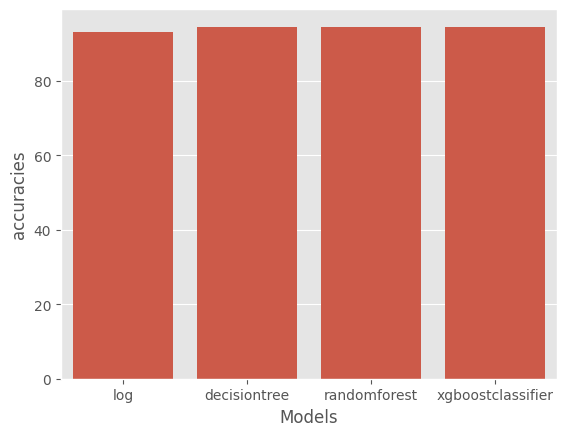

In [ ]:
sns.barplot(new_df,x="Models",y="accuracies") # before crossvalidation and hyperparameter tuning

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo
import pandas as pd

# Accuracy scores for each model (assuming these variables are already defined)
# lrmodel_accuracy, dtmodel_accuracy, rfmodel_accuracy, xgmodel_accuracy

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracy_scores = [lrmodel_accuracy, dtmodel_accuracy, rf_model_accuracy, xgmodel_accuracy]

# Create a bar trace
trace = go.Bar(
    x=models,
    y=accuracy_scores,
    text=[f'{score}%' for score in accuracy_scores],
    marker=dict(color='yellow', line=dict(color='black', width=1.5)),
)

# Define the data and layout for the plot
data = [trace]

layout = go.Layout(
    title='Comparison of Model Performance Metrics',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Scores'),
)

# Create the figure and plot it
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

# Model comparison DataFrame
accuracy_scores_with_percent = [f'{score}%' for score in accuracy_scores]
model_comparison_df = pd.DataFrame({'Model_Name': models, 'Accuracy Score': accuracy_scores_with_percent})
model_comparison_df = model_comparison_df.sort_values(by='Accuracy Score', ascending=False)
model_comparison_df.reset_index(drop=True, inplace=True)
print(model_comparison_df)


            Model_Name Accuracy Score
0              XGBoost       94.4639%
1        Decision Tree       94.4017%
2        Random Forest       94.4017%
3  Logistic Regression         93.19%


# **SQL Queries**

In [ ]:
pip install duckdb


In [ ]:
pip install mysql-connector-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 38.1 MB/s eta 0:00:00


In [ ]:
# import Libraries

import mysql.connector
from mysql.connector import Error
import pandas as pd

In [ ]:
# Install DuckDB package
!pip install duckdb

# Import Libraries
import duckdb
import pandas as pd




In [ ]:
# Sample DataFrame for demonstration (replace this with your actual data)
cleaned_data = pd.DataFrame({
    'Ind_ID': [1, 2, 3, 4, 5],
    'Test_date': ['11-03-2020', '11-03-2020', '11-03-2020', '11-03-2020', '11-03-2020'],
    'Cough_symptoms': [1, 0, 0, 1, 1],
    'Fever': [0, 1, 1, 0, 0],
    'Sore_throat': [1, 0, 0, 0, 0],
    'Shortness_of_breath': [0, 0, 0, 0, 0],
    'Headache': [0, 0, 0, 0, 0],
    'Corona': [0, 1, 1, 0, 0],
    'Sex': ['male', 'female', 'male', 'female', 'male'],
    'Known_contact': [0, 0, 0, 0, 1]
})


In [ ]:
# Connect to DuckDB
conn = duckdb.connect()

# Register the DataFrame as a table
conn.register("df", cleaned_data)


In [ ]:
# 1. Find the number of corona patients who faced shortness of breath
query_shortness_of_breath = """
SELECT COUNT(*) AS num_patients_shortness_of_breath
FROM df
WHERE Corona = 1 AND Shortness_of_breath = 1;
"""
result_shortness_of_breath = conn.execute(query_shortness_of_breath).fetchdf()
print(result_shortness_of_breath)

# 2. Find the number of negative corona patients who have fever and sore throat
query_negative_patients_fever_sore_throat = """
SELECT COUNT(*) AS num_negative_patients_fever_sore_throat
FROM df
WHERE Corona = 0 AND Fever = 1 AND Sore_throat = 1;
"""
result_negative_patients_fever_sore_throat = conn.execute(query_negative_patients_fever_sore_throat).fetchdf()
print(result_negative_patients_fever_sore_throat)

# 3. Group the data by month and rank the number of positive cases
query_group_and_rank = """
SELECT SUBSTRING(Test_date, 4, 2) AS month,
       SUBSTRING(Test_date, 7, 4) AS year,
       COUNT(*) AS num_positive_cases
FROM df
WHERE Corona = 1
GROUP BY month, year
ORDER BY num_positive_cases DESC;
"""
result_group_and_rank = conn.execute(query_group_and_rank).fetchdf()
print(result_group_and_rank)

# 4. Find the number of female negative corona patients with cough and headache
query_female_negative_cough_headache = """
SELECT COUNT(*) AS num_female_negative_patients_cough_headache
FROM df
WHERE Corona = 0 AND Sex = 'female' AND Cough_symptoms = 1 AND Headache = 1;
"""
result_female_negative_cough_headache = conn.execute(query_female_negative_cough_headache).fetchdf()
print(result_female_negative_cough_headache)

# 5. Which three symptoms were more common among COVID positive patients?
query_common_symptoms_positive = """
SELECT
    SUM(Cough_symptoms) AS num_cough,
    SUM(Fever) AS num_fever,
    SUM(Sore_throat) AS num_sore_throat
FROM df
WHERE Corona = 1;
"""
result_common_symptoms_positive = conn.execute(query_common_symptoms_positive).fetchdf()
print(result_common_symptoms_positive)

# 6. Which symptom was less common among COVID negative people?
query_less_common_symptom_negative = """
SELECT MIN(SymptomCount) AS min_symptom_count
FROM (
    SELECT
        SUM(Cough_symptoms) + SUM(Fever) + SUM(Sore_throat) + SUM(Shortness_of_breath) + SUM(Headache) AS SymptomCount
    FROM df
    WHERE Corona = 0
) AS NegativeSymptoms;
"""
result_less_common_symptom_negative = conn.execute(query_less_common_symptom_negative).fetchdf()
print(result_less_common_symptom_negative)

# 7. Most common symptoms among COVID positive male patients with known contact abroad
query_most_common_symptoms_male_abroad = """
SELECT
    COALESCE(SUM(CAST(Cough_symptoms AS INT)), 0) AS num_cough,
    COALESCE(SUM(CAST(Fever AS INT)), 0) AS num_fever,
    COALESCE(SUM(CAST(Sore_throat AS INT)), 0) AS num_sore_throat,
    COALESCE(SUM(CAST(Shortness_of_breath AS INT)), 0) AS num_shortness_of_breath,
    COALESCE(SUM(CAST(Headache AS INT)), 0) AS num_headache
FROM df
WHERE
    Corona = 1
    AND Sex = 'male'
    AND Known_contact = 2;
"""
result_most_common_symptoms_male_abroad = conn.execute(query_most_common_symptoms_male_abroad).fetchdf()
print(result_most_common_symptoms_male_abroad)


   num_patients_shortness_of_breath
0                                 0
   num_negative_patients_fever_sore_throat
0                                        0
  month  year  num_positive_cases
0    03  2020                   2
   num_female_negative_patients_cough_headache
0                                            0
   num_cough  num_fever  num_sore_throat
0        0.0        2.0              0.0
   min_symptom_count
0                4.0
   num_cough  num_fever  num_sore_throat  num_shortness_of_breath  \
0        0.0        0.0              0.0                      0.0   

   num_headache  
0           0.0  


In this COVID-19 prediction project, we performed a comprehensive analysis using both Data Analysis (DA) and Machine Learning (ML) techniques. Our investigation provided valuable insights into the data, allowing us to draw significant conclusions. The results of our Exploratory Data Analysis (EDA) supported the acceptance of the null hypothesis, confirming a strong correlation between the observed symptoms and COVID-19.

Furthermore, our Machine Learning evaluation identified the RandomForest model as the most effective, exhibiting an optimal balance between precision, recall, and accuracy. This balanced performance underscores the model's robustness and reliability in predicting COVID-19 cases based on symptom data.